In [ ]:
Topics:  (1) dealing with missing values (NaNs)
         (2) categorical data (ordinal or nominal)
         (3) selecting features

In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0, 2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''


df = pd.read_csv(StringIO(csv_data))


In [2]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# only drop rows when all columns are nans
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# only drop rows that have at least 4 non-NANs values
df.dropna(thresh=3)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [10]:
# Dealing with missing values
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

# Categorical data -- Nominal or Ordinal

In [19]:
# Handling categorical data, Nominal: green,red,blue  Ordinal: M<L<XL
import pandas as pd
df = pd.DataFrame([
        ['green','M',  10.1,'class1'],
        ['red'  ,'L',  13.5,'class2'],
        ['blue' ,'XL', 15.3,'class1']])

df.columns = ['color','size','price','classlabel']


In [20]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [21]:
# you can change the categorical variable directly using dictionary's key/value pairs
# or by using library packages
size_mapping = {'XL':3,
                'L':2,
                'M':1 }
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [22]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
df['classlabel'] = y
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [23]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [24]:
# What about the color of the shirt?
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder # Use one-hot encoding for nominal features
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [26]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[0:100]
y = iris.target[0:100]

#from sklearn.cross_validation import train_test_split # DeprecationWarning
from sklearn.model_selection import train_test_split 


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(' ')
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.6, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(70, 4) (30, 4) (70,) (30,)
 
(60, 4) (40, 4) (60,) (40,)


## Scaling

([array([ 1.,  1.,  7.,  5.,  3.,  4.,  6.,  6.,  4.,  3.]),
  array([  3.,   3.,   2.,   7.,  11.,   3.,   6.,   2.,   2.,   1.]),
  array([  1.,   7.,   8.,   1.,   0.,   0.,   2.,   2.,   7.,  12.]),
  array([  0.,  11.,   5.,   0.,   1.,   0.,   4.,  10.,   3.,   6.])],
 array([-0.14285714, -0.03626374,  0.07032967,  0.17692308,  0.28351648,
         0.39010989,  0.4967033 ,  0.6032967 ,  0.70989011,  0.81648352,
         0.92307692]),
 <a list of 4 Lists of Patches objects>)

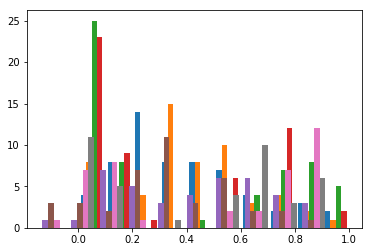

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm  = mms.transform(X_test)

plt.hist(X_train_norm)
plt.hist(X_test_norm)


([array([  3.,   4.,  19.,   8.,   8.,   7.,   4.,   2.,   3.,   2.]),
  array([  8.,   5.,   4.,  15.,   8.,  10.,   3.,   4.,   2.,   1.]),
  array([  0.,   7.,  26.,   0.,   2.,   6.,  13.,   6.,   0.,   0.]),
  array([  0.,   5.,  27.,   1.,   0.,   6.,  17.,   3.,   1.,   0.])],
 array([-1.85049316, -1.3924143 , -0.93433545, -0.47625659, -0.01817773,
         0.43990112,  0.89797998,  1.35605884,  1.81413769,  2.27221655,
         2.73029541]),
 <a list of 4 Lists of Patches objects>)

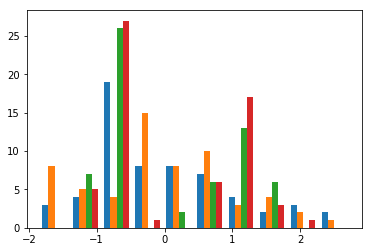

In [30]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm  = stdsc.transform(X_test)

plt.hist(X_train_norm)
#plt.hist(X_test_norm)


# Selecting meaningful features
## Sparse Solutions with L1 regularization

In [31]:
# p. 108
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic Acid','Ash','Alcalinity of ash',
                   'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                   'Proantyhocyanins','Color Intensity','Hue','OD280/0D315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [32]:
df_wine.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proantyhocyanins,Color Intensity,Hue,OD280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
# pg 109.
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   test_size = 0.3,
                                                   random_state = 0)


([array([  1.,   6.,  14.,  20.,  16.,  18.,  18.,  17.,  10.,   4.]),
  array([ 18.,  40.,  19.,   7.,  10.,  10.,   9.,   6.,   2.,   3.]),
  array([  1.,   2.,   3.,  12.,  27.,  37.,  25.,  15.,   1.,   1.]),
  array([  5.,   2.,  16.,  24.,  29.,  21.,  15.,   8.,   2.,   2.]),
  array([  3.,  26.,  32.,  32.,  17.,   6.,   4.,   2.,   1.,   1.]),
  array([  4.,  20.,  18.,  21.,  13.,  20.,  18.,   7.,   1.,   2.]),
  array([ 24.,   9.,   9.,  12.,   9.,  13.,  15.,  16.,  10.,   7.]),
  array([  6.,  15.,  25.,  18.,  16.,  15.,   9.,  10.,   4.,   6.]),
  array([  6.,  17.,  21.,  29.,  25.,  12.,   5.,   6.,   1.,   2.]),
  array([ 11.,  26.,  23.,  21.,  12.,  11.,   8.,   5.,   6.,   1.]),
  array([ 17.,  13.,  21.,  15.,  28.,  17.,   8.,   4.,   0.,   1.]),
  array([ 10.,  17.,   9.,   9.,   8.,  22.,  19.,  16.,  12.,   2.]),
  array([ 18.,  22.,  28.,  13.,   9.,  11.,   8.,   8.,   3.,   4.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),


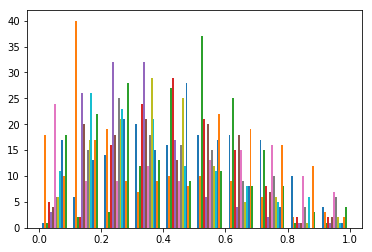

In [34]:
# Bring features onto the same scale
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm  = mms.transform(X_test) 
plt.hist(X_train_norm)

([array([  0.,   1.,  13.,  29.,  30.,  31.,  19.,   1.,   0.,   0.]),
  array([  0.,   0.,   2.,  55.,  27.,  18.,  15.,   5.,   2.,   0.]),
  array([  1.,   3.,  11.,  16.,  47.,  29.,  16.,   0.,   1.,   0.]),
  array([  0.,   4.,   5.,  29.,  41.,  26.,  15.,   3.,   1.,   0.]),
  array([  0.,   0.,   4.,  38.,  46.,  22.,   8.,   3.,   1.,   2.]),
  array([  0.,   0.,  13.,  31.,  29.,  32.,  16.,   2.,   1.,   0.]),
  array([  0.,   0.,  22.,  20.,  28.,  34.,  20.,   0.,   0.,   0.]),
  array([  0.,   0.,   7.,  44.,  29.,  22.,  14.,   8.,   0.,   0.]),
  array([  0.,   0.,  12.,  25.,  44.,  27.,   7.,   7.,   2.,   0.]),
  array([  0.,   0.,   5.,  44.,  38.,  17.,  12.,   7.,   1.,   0.]),
  array([  0.,   0.,  17.,  21.,  33.,  35.,  15.,   2.,   1.,   0.]),
  array([  0.,   0.,  19.,  22.,  24.,  40.,  18.,   1.,   0.,   0.]),
  array([  0.,   0.,   4.,  43.,  37.,  20.,  15.,   5.,   0.,   0.])],
 array([-3.64434861, -2.8558653 , -2.06738198, -1.27889866, -0.49041534,
   

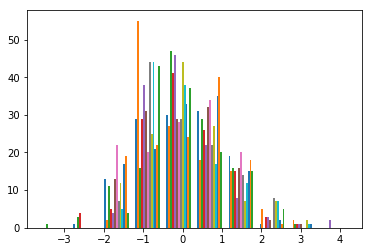

In [35]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std  = stdsc.transform(X_test)
plt.hist(X_train_std)

In [36]:
# Selecting meaningful Features
# do L1 regularized Logistic Regression to standardized wine data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [37]:
# look at intercept
lr.intercept_ # why three of them?

array([-0.38382776, -0.15805731, -0.70044372])

In [38]:
lr.coef_ # ah, three models One-vs-Rest (OvR)

array([[ 0.28022602,  0.        ,  0.        , -0.0279939 ,  0.        ,
         0.        ,  0.71008389,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23605808],
       [-0.64406304, -0.06876004, -0.05720359,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92673857,
         0.06017924,  0.        , -0.37100733],
       [ 0.        ,  0.06156586,  0.        ,  0.        ,  0.        ,
         0.        , -0.6355193 ,  0.        ,  0.        ,  0.49788212,
        -0.35817955, -0.57200408,  0.        ]])

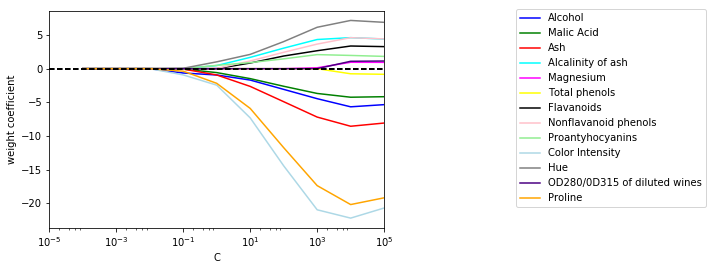

In [39]:
# L1 regularization a method for feature selection
# C is small more emphasis on lower weights on features

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan',
         'magenta','yellow','black',
         'pink','lightgreen','lightblue',
         'gray','indigo','orange']
weights, params = [], []
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1',
                           C = 10**int(c),
                           random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**int(c))

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:,column], label = df_wine.columns[column+1],
             color = color)
plt.axhline(0, color = 'black', linestyle ='--', linewidth=2)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper left', 
         bbox_to_anchor = (1.38, 1.03),
         ncol=1, fancybox=True)
plt.show()

In [40]:
# Sequential feature selection algorithms
# SBS - Sequential Backward Selection

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
#        print('base score of',score)

        
        while dim > self.k_features:
#            print([dim, self.k_features])
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
#            print('self.indices', self.indices_)
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [41]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)



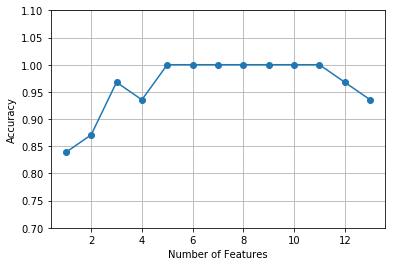

In [42]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()


In [43]:
# What are those five features?
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])


Index(['Alcohol', 'Malic Acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [44]:
# p. 124 Assessing Feature Importance with RF
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 100, 
                               random_state = 1,
                               n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
#print(importances)
indices = np.argsort(importances)[::-1] # sort from largest importances to smallest, get index location here

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Color Intensity                0.164909
 2) Flavanoids                     0.164451
 3) Proline                        0.158675
 4) OD280/0D315 of diluted wines   0.154081
 5) Alcohol                        0.115701
 6) Hue                            0.070989
 7) Total phenols                  0.053835
 8) Proantyhocyanins               0.028817
 9) Alcalinity of ash              0.028478
10) Malic Acid                     0.024253
11) Magnesium                      0.015646
12) Nonflavanoid phenols           0.010544
13) Ash                            0.009623


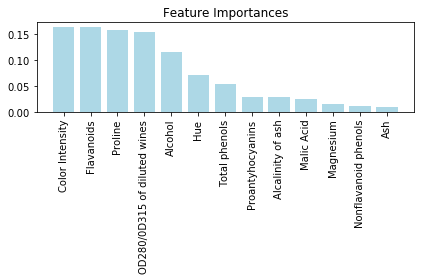

In [45]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color = 'lightblue',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
                feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [46]:
X_selected = forest.transform(X_train, threshold=0.15)
print(X_selected.shape)
print(forest.feature_importances_)
print(feat_labels)


/Users/Jim/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 4)
[ 0.11570061  0.02425271  0.00962315  0.0284778   0.01564646  0.0538354
  0.16445077  0.0105437   0.02881676  0.16490856  0.07098853  0.15408093
  0.15867463]
Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proantyhocyanins', 'Color Intensity', 'Hue',
       'OD280/0D315 of diluted wines', 'Proline'],
      dtype='object')


In [47]:
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), feat_labels), 
             reverse=True))

[(0.16489999999999999, 'Color Intensity'), (0.16450000000000001, 'Flavanoids'), (0.15870000000000001, 'Proline'), (0.15409999999999999, 'OD280/0D315 of diluted wines'), (0.1157, 'Alcohol'), (0.070999999999999994, 'Hue'), (0.053800000000000001, 'Total phenols'), (0.028799999999999999, 'Proantyhocyanins'), (0.028500000000000001, 'Alcalinity of ash'), (0.024299999999999999, 'Malic Acid'), (0.015599999999999999, 'Magnesium'), (0.010500000000000001, 'Nonflavanoid phenols'), (0.0095999999999999992, 'Ash')]


# double check if this makes sense
import statsmodels.api as sm

y = y_train  # response
X = X_train  # predictor
X = sm.add_constant(X)
est = sm.OLS(y, X)
est = est.fit()
print(est.summary())